In [ ]:
Github Repo -

## Project Description ##  - 

#### I am using "Wine" dataset from the UCI Machine Learning Repository, which contains chemical analysis results of wines grown in the same region in Italy but derived from three different cultivars. i will perform clustering to group the wines based on their chemical properties ####

## Load Dataset ##

In [5]:
import pandas as pd

# Load the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Cultivar', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
    'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'
]
data = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
data.head()


,Cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Identify an Unsupervised Learning Problem  - I will use clustering to group the wines based on their chemical properties. ##

## Exploratory Data Analysis (EDA) ##

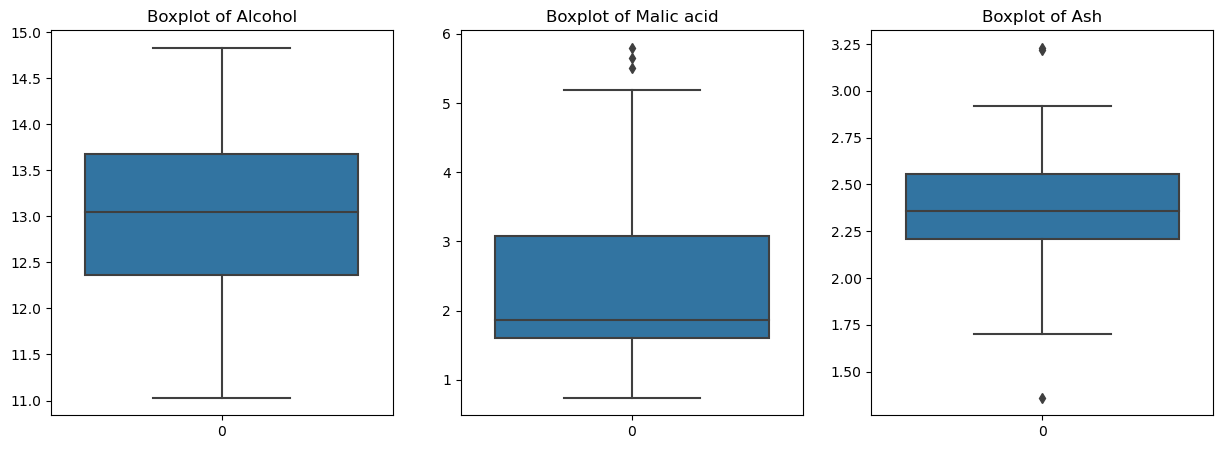

In [6]:
# Display summary statistics
data.describe()

# Box-plot for Alcohol, Malic acid, and Ash
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data['Alcohol'])
plt.title('Boxplot of Alcohol')

plt.subplot(1, 3, 2)
sns.boxplot(data['Malic acid'])
plt.title('Boxplot of Malic acid')

plt.subplot(1, 3, 3)
sns.boxplot(data['Ash'])
plt.title('Boxplot of Ash')

plt.show()

##  Correlation Analysis ##

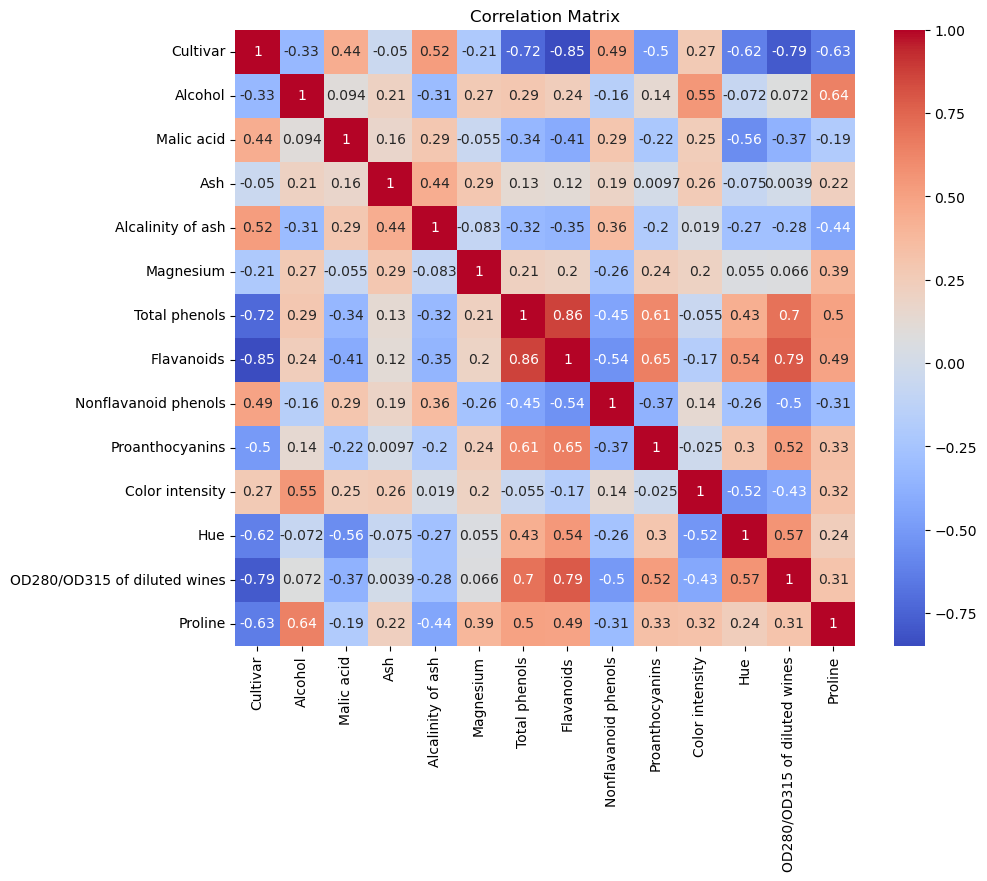

In [7]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Data Cleaning ##

In [8]:
# Check for missing values
data.isnull().sum()

# Drop the 'Cultivar' column since it's a label for supervised learning
data_cleaned = data.drop(columns=['Cultivar'])

# Display the cleaned data
data_cleaned.head()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Perform Analysis Using Unsupervised Learning Models ##
### K-means Clustering ###

C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

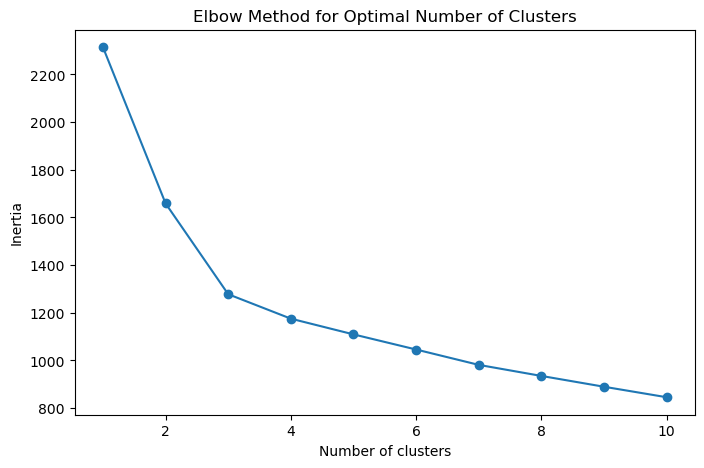

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Find the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## From the elbow plot, let's assume the optimal number of clusters is 3. ##

C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Gyadav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


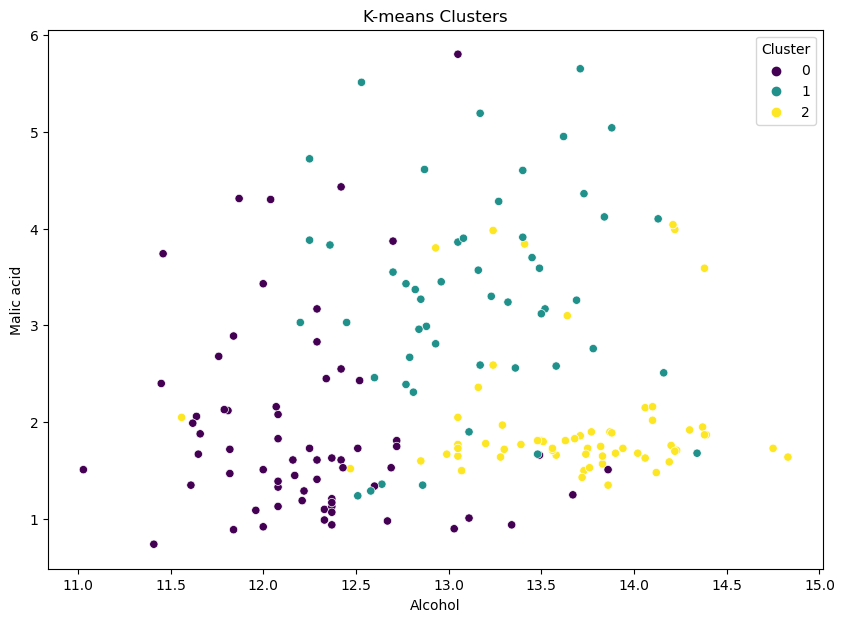

In [11]:
# K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='Alcohol', y='Malic acid', hue='Cluster', palette='viridis')
plt.title('K-means Clusters')
plt.show()


## Conclusion ##

### Have performed clustering on the Wine dataset using the K-means algorithm. We identified that 3 clusters were appropriate using the elbow method. The clusters were visualized based on the wines' alcohol and malic acid content. 


### Understanding the Plot

##### The scatter plot shows the distribution of wines based on two features: Alcohol and Malic acid. The wines are grouped into three clusters, each represented by a different color - 
- X-axis (Alcohol): This axis represents the alcohol content in the wine.
- Y-axis (Malic acid): This axis represents the malic acid content in the wine.

##### Clusters: The three clusters are represented by different colors:
-  Cluster 0: Purple dots
-  Cluster 1: Teal dots
-  Cluster 2: Yellow dots

##### Interpretation: - 
- Cluster 0 (Purple)
    - This cluster tends to have lower alcohol content, mostly ranging from 11.0 to 12.5.
    - The malic acid content in this cluster varies more widely, but it generally stays below 3.

- Cluster 1 (Teal)
    - This cluster covers a broader range of alcohol content, from around 12.0 to 14.0.
    - The malic acid content is also quite varied, ranging from about 1.0 to 5.0, indicating that this cluster includes wines with diverse chemical properties.

- Cluster 2 (Yellow)
    - This cluster has higher alcohol content, mostly ranging from 13.0 to 15.0.
    - The malic acid content in this cluster is relatively lower, mostly staying below 2, with a few exceptions.

- Key Observations: - 
    - Separation of Clusters: The clusters show distinct groupings based on the alcohol and malic acid content, suggesting that these features are useful in distinguishing between different types of wines.

    - Diversity within Clusters: Cluster 1 (Teal) shows the highest diversity in both alcohol and malic acid content, indicating that it encompasses a wider range of wine types compared to Clusters 0 and 2.
    
    - Alcohol Content as a Key Factor: The distribution of clusters along the alcohol axis suggests that alcohol content is a significant factor in distinguishing different groups of wines.


- Conclusion 
    - The K-means clustering algorithm successfully grouped the wines into three distinct clusters based on their chemical properties. Each cluster represents wines with similar characteristics, which can be useful for understanding the differences between wines and potentially identifying patterns related to wine quality, origin, or type.